# Dataset Manipulation

In [ ]:
#load libraries
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image

In [ ]:
#omit Pokémon Trainer and split into composite pokemon 
characters='Cloud,Pokémon Trainer,Pikachu,Peach/Daisy,Zero Suit Samus,Joker,Palutena,Wario,Lucina,Mr. Game & Watch,Olimar,R.O.B.,Snake,Roy,Inkling,Mario,Wolf,Fox,Young Link,Mega Man,Ness'
character_col= characters
character_row= 'Pokémon Trainer,Joker,Palutena,Lucina,Mr. Game & Watch,Wolf,Peach/Daisy,Young Link,Wolf,Roy'
charrow_list=character_row.split(',') #create list of top tiers that I play(rows)
charcol_list=character_col.split(',') #create list of top tiers that I play against(columns)
import pandas as pd
matrix= pd.read_csv('MatchupMatrix.csv') #load data
match_mat=matrix.fillna(value=0) #replace NaNs with 0
match_mat=match_mat.replace(to_replace='-',value=0) #replace '-' with 0 so we can do mathematical operations

In [ ]:
##extracting only relevant info from initial data
isin=match_mat['Unnamed: 0'].isin(charrow_list) #returns booleans for every entry of the data that has value from char_list
indices=match_mat.index[isin== True].tolist() #gets indices that satisfies above requirement
mymatch=match_mat.iloc[indices,:] #creates new matrix from data of only top-tiers
mymatch.index=mymatch['Unnamed: 0']

In [ ]:
mymatch

,Unnamed: 0,Unnamed: 1,Palutena,Joker,Peach/Daisy,Pikachu,Zero Suit Samus,Wario,Lucina,Shulk,...,Isabelle,King Dedede,Jigglypuff,Kirby,King K. Rool,Ganondorf,Little Mac,Squirtle,Ivysaur,Charizard
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Palutena,Palutena,0.0,0,-0.4,0.2,-1.1,-0.2,0.5,-0.1,0.7,...,1.6,2.3,1.4,0.7,2.4,1.9,1.5,0.0,1.0,0.0
Joker,Joker,0.0,0.4,0,0.0,-1.0,0.8,0.6,0.5,0.0,...,1.1,1.6,1.2,1.2,1.8,2.0,2.0,0.0,1.0,0.0
Peach/Daisy,Peach/Daisy,0.0,-0.2,0.0,0,0.3,-0.5,0.5,-0.2,-1.1,...,0.3,0.8,0.6,1.1,1.8,1.4,1.8,0.6,-0.7,0.1
Lucina,Lucina,0.0,0.1,-0.5,0.2,-0.6,-0.3,0.4,0,-0.4,...,1.4,1.2,1.8,1.2,1.3,1.8,1.9,0.2,0.8,-0.1
Pokémon Trainer,Pokémon Trainer,0.0,0.4,-0.3,0.0,-0.9,0.4,0.3,0.1,-0.4,...,1.4,1.3,1.0,1.6,1.7,2.1,1.7,0,0,0
Wolf,Wolf,0.0,0.0,-0.5,-0.4,-1.2,0.9,0.3,0.0,-0.8,...,1.3,1.5,1.2,1.2,1.4,0.9,1.8,0.5,1.0,1.0
Mr. Game & Watch,Mr. Game & Watch,0.0,-1.2,-0.3,0.9,1.1,-1.2,0.6,-0.6,-1.5,...,1.2,2.0,1.4,1.5,2.1,1.9,1.6,0.0,0.0,0.5
Roy,Roy,0.0,0.4,-0.6,0.0,-1.0,0.7,-0.1,0.0,0.1,...,1.1,1.1,1.0,0.6,1.7,1.1,1.2,0.0,1.0,0.0
Young Link,Young Link,0.0,-1.3,-0.9,0.1,-1.2,0.0,-0.3,-0.5,-1.6,...,0.8,2.0,0.9,1.8,2.1,1.8,1.9,0.0,2.0,1.0


In [ ]:
##checking for errors
CharLstDf=pd.DataFrame(charrow_list) #list --> df
test=list(match_mat['Unnamed: 0'])   #df --> list
isin2=CharLstDf.isin(test)     #returns booleans for every entry in char_list that isn't in new matrix(checks for misses)
indices2=isin2.index[isin2[0]==False].tolist() #gets indices that satisifes above requirement
CharLstDf.iloc[indices2,:] #creates new rectified matrix 
if mymatch.shape[0] == len(charrow_list): #check to see if anything is missing
    print('Nothing missing')
else:
    print("Something missing")

Something missing


In [ ]:
##since payoff matrix has rows=cols, then this time we do for columns
empty=[] #loop over each column name, and if it isn't in char_list, add it to a list to drop it
for _ in mymatch.columns:
    if _ in charcol_list:
        continue
    else:
        empty.append(_)
mymatch=mymatch.drop(columns=empty)
mymatch=pd.DataFrame(mymatch,dtype=float)
labels=mymatch.index
reg_matchup=mymatch.set_index(labels) #reset index names(cols=rows)

In [ ]:
MyMatchupMatrix=reg_matchup.to_csv(r'C:\Users\Michael\Documents\Python Scripts\MyMatchupMatrix.csv') #save raw dataframe

In [ ]:
##standardize and normalize the columns(variables)
stds=reg_matchup.std(axis=0) #get the std of each column
avgs=reg_matchup.mean(axis=0) #get the avg of each column
normalized=reg_matchup.sub(avgs,axis=1) #subtract avg from each column
standnorm=normalized.div(stds,axis=1) #divide std from each column
mymatch=pd.DataFrame(standnorm,index=labels)
mymatch=mymatch.fillna(value=0)
print(mymatch.std(axis=0))
mymatch.columns
mymatch.index

Palutena            1.0
Joker               1.0
Peach/Daisy         1.0
Pikachu             1.0
Zero Suit Samus     1.0
Wario               1.0
Lucina              1.0
Pokémon Trainer     1.0
Inkling             1.0
Wolf                1.0
Fox                 1.0
Snake               1.0
Mario               1.0
Mr. Game & Watch    1.0
R.O.B.              1.0
Roy                 1.0
Olimar              1.0
Mega Man            1.0
Young Link          1.0
Cloud               1.0
Ness                1.0
dtype: float64


Index(['Palutena', 'Joker', 'Peach/Daisy', 'Lucina', 'Pokémon Trainer', 'Wolf',
       'Mr. Game & Watch', 'Roy', 'Young Link'],
      dtype='object', name='Unnamed: 0')

In [ ]:
NormSSBU=mymatch.to_csv(r'C:\Users\Michael\Documents\MATLAB\NormSSBU.csv') #save normalized version 

# Data Analysis

## Sklearn-PCA

In [ ]:
pca=PCA(n_components=min(mymatch.shape)) #initialize principal components from sklearn
fit_tran=pca.fit_transform(mymatch) #this is the data-matrix x pca loadings = scores for each character
pcaDF=pd.DataFrame(fit_tran,index=labels) #(characters vs. concept matrix)
print('First 3 ratios of explained variance are') 
pca.explained_variance_ratio_[0:4] #shows how much variance is explained by the first 3 principal components

First 3 ratios of explained variance are


array([0.32694742, 0.27890271, 0.1522353 , 0.11277571])

### Scores

Negative & Positive PC:1
Wolf , Mr. Game & Watch


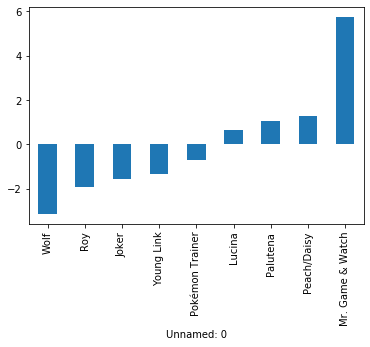

Negative & Positive PC:2
Joker , Young Link


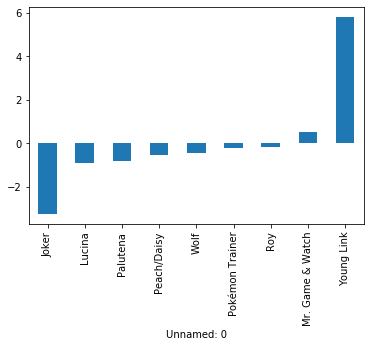

Negative & Positive PC:3
Peach/Daisy , Palutena


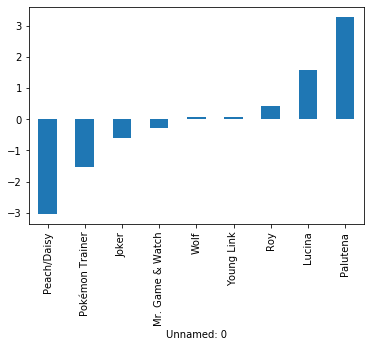

In [ ]:
##for each principal component, rank from least to greatest that each sample(character) scores
for pc in [0,1,2]: #python indexing
    sorts=pcaDF[pc].sort_values(axis=0) #sort values of the series vertically
    print('Negative & Positive PC:'+ str(pc+1))
    print(sorts.index[0], ',',sorts.index[-1]) #show which variables contribute minimally and maximally
    sorts.plot.bar() #graph sorted values
    plt.show()    

### Loadings

In [ ]:
pca.components_.shape #shape is k-components x m variables, so right now it is V-transposed
loadings=pca.components_.T
print(loadings.shape) #shape is now m variable x k-components

(21, 9)


Negative & Positive PC Loading:1
Zero Suit Samus , Peach/Daisy


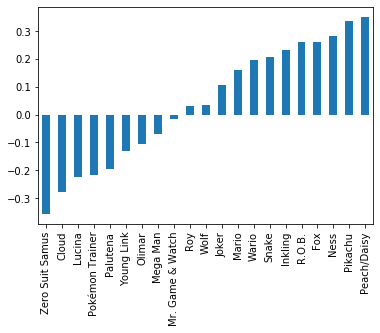

Negative & Positive PC Loading:2
Wolf , Pokémon Trainer


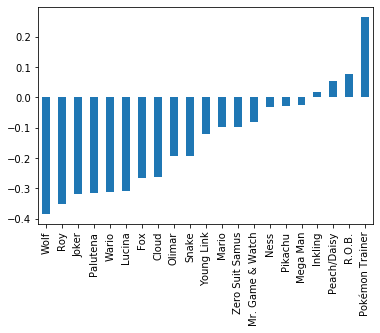

Negative & Positive PC Loading:3
Inkling , Mr. Game & Watch


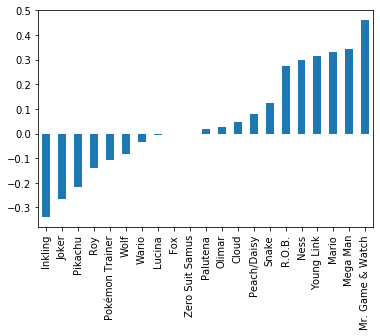

In [ ]:
variables=mymatch.columns
first3loadings=pd.DataFrame(loadings[:,0:3],index=variables)
for pc in [0,1,2]: #python indexing
    sorts=first3loadings[pc].sort_values(axis=0) #sort values of the series vertically
    print('Negative & Positive PC Loading:'+ str(pc+1))
    print(sorts.index[0], ',',sorts.index[-1]) #show which variables contribute minimally and maximally
    sorts.plot.bar() #graph sorted values
    plt.show()  

## Graphing

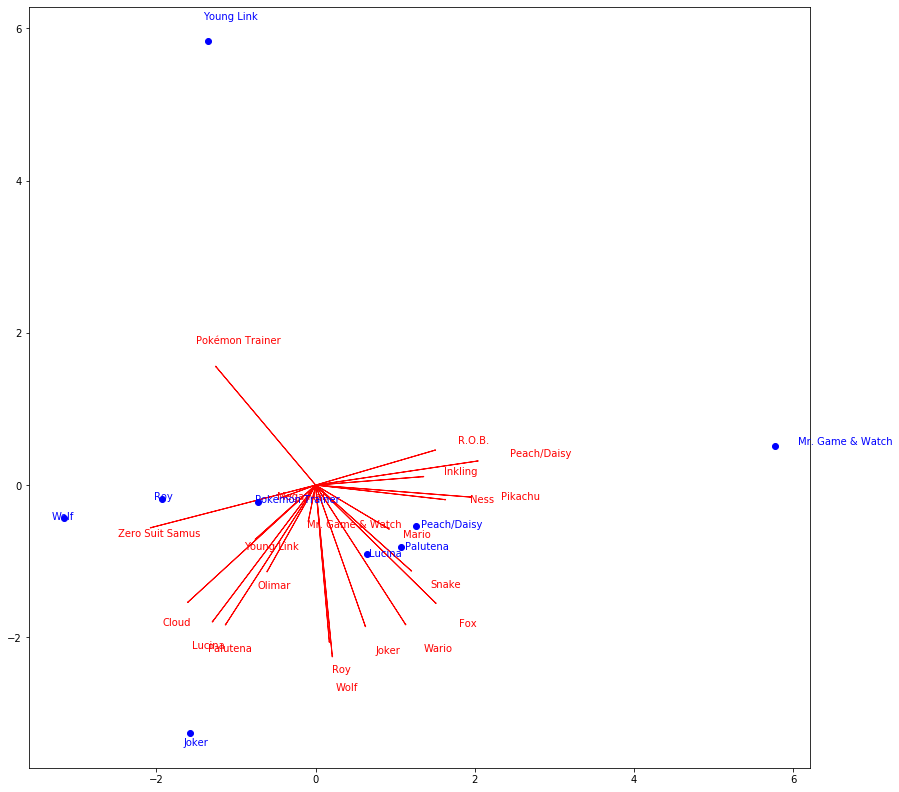

In [ ]:
##pc1 vs pc2
def biplot12(pc,loadings,labels=None): #got this from stackexchange(only takes arrays and not DFs)
    loadingsT=loadings.T #shape should be k components x m variables(so now 9 x 19)
    xs = pc[:,0] #pc1 scores
    ys = pc[:,1] #pc2 scores
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(14,14))
    xvector = loadingsT[0] #pc1 loadings
    yvector = loadingsT[1] #pc2 loadings
    for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.001, head_width=0.01)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(mymatch.columns.values)[i], color='r')

    for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.05, ys[i]*1.05, list(mymatch.index)[i], color='b')
    plt.show()
biplot12(fit_tran,loadings,labels=labels)

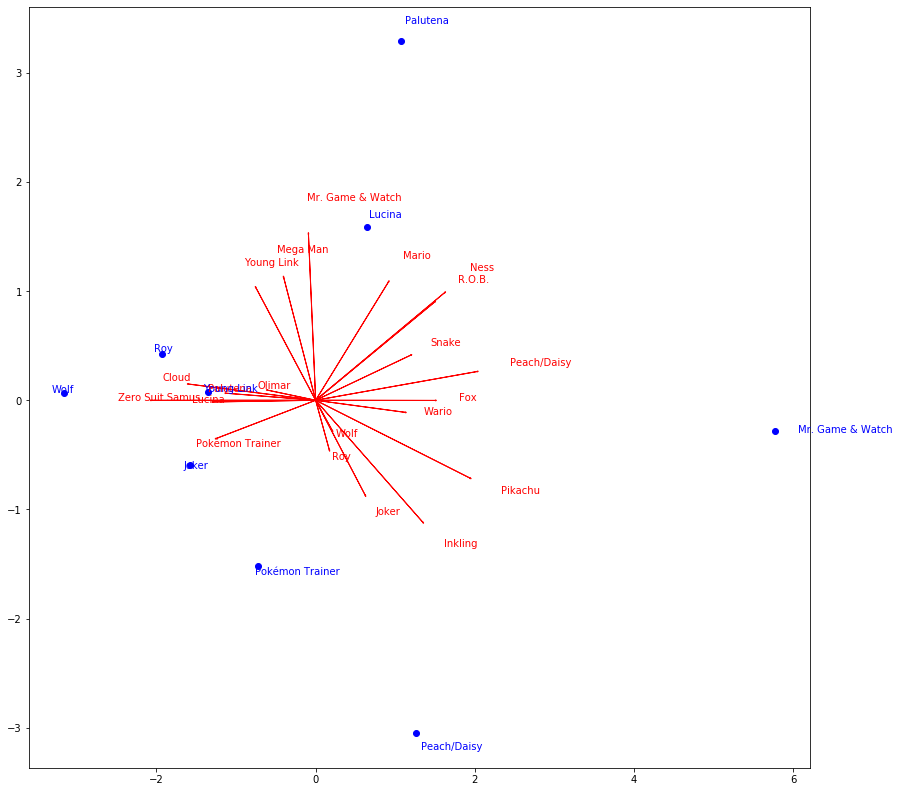

In [ ]:
##pc1 vs pc3
def biplot23(pc,loadings,labels=None): #got this from stackexchange(only takes arrays and not DFs)
    loadingsT=loadings.T #shape should be k components x m variables(so now 9 x 19)
    xs = pc[:,0] #pc1 scores
    ys = pc[:,2] #pc2 scores
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(14,14))
    xvector = loadingsT[0] #pc1 loadings
    yvector = loadingsT[2] #pc2 loadings
    for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.001, head_width=0.01)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(mymatch.columns.values)[i], color='r')

    for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.05, ys[i]*1.05, list(mymatch.index)[i], color='b')
    plt.show()
biplot23(fit_tran,loadings,labels=labels)

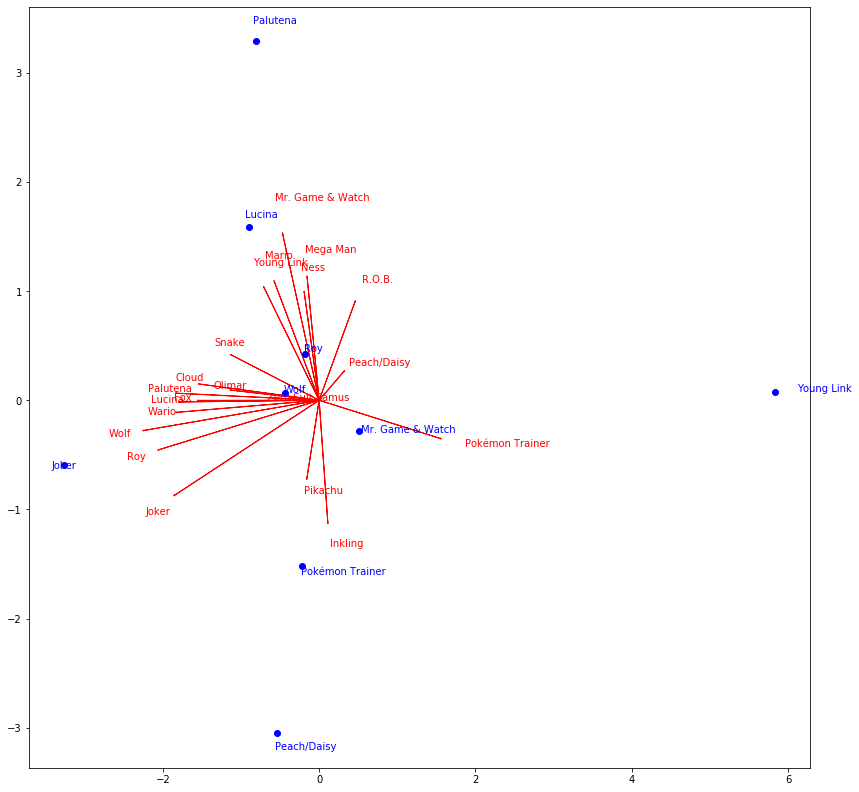

In [ ]:
##pc2 vs pc3
def biplot23(pc,loadings,labels=None): #got this from stackexchange(only takes arrays and not DFs)
    loadingsT=loadings.T #shape should be k components x m variables(so now 9 x 19)
    xs = pc[:,1] #pc1 scores
    ys = pc[:,2] #pc2 scores
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(14,14))
    xvector = loadingsT[1] #pc1 loadings
    yvector = loadingsT[2] #pc2 loadings
    for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.001, head_width=0.01)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(mymatch.columns.values)[i], color='r')

    for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.05, ys[i]*1.05, list(mymatch.index)[i], color='b')
    plt.show()
biplot23(fit_tran,loadings,labels=labels)